[[ 0.62  3.33  0.14  2.55  1.41  2.41  1.19  2.57  1.16  1.34  0.96  0.13
   1.89  0.18  0.89  0.22  0.57  0.24  0.84  0.57  1.93  1.82  2.43  2.5
   0.62  1.96  0.58  1.81  1.36  1.93  2.51  2.6   3.29  0.45  0.63  2.06
   1.19  0.29  0.19  1.78  0.06  1.38  2.15  1.89  0.21  1.31  1.72  1.22
   1.18  1.22  1.98  0.48  1.25  1.22  0.11  0.19  2.64  0.29  1.3   0.81
   0.84  2.75  1.22  1.21  0.24  0.24  0.72  1.74  1.35  1.46  0.17  0.57
   0.04  0.76  0.23  1.89  0.3   0.13  2.11  2.47  3.23  1.33  0.58  0.21
   1.78  1.38  0.34  0.47  1.3   3.37  1.33  0.89  1.33  1.86  2.02  1.95
   1.18  0.29  0.26  1.28]
 [ 1.35  2.6   1.22  1.22  2.64  1.27  2.56  4.    1.3   1.24  1.2   1.19
   2.59  2.41  2.46  3.85  1.14  2.55  1.25  2.51  4.11  2.44  1.21  1.28
   1.26  1.28  2.5   2.5   1.17  1.16  1.3   3.84  2.48  2.43  3.83  1.14
   1.2   2.59  2.61  2.53  2.59  2.48  1.28  1.21  1.21  1.22  1.26  1.19
   1.13  2.55  2.48  4.24  1.19  2.5   1.22  2.58  1.19  1.27  1.22  2.46
   2.58  1.2

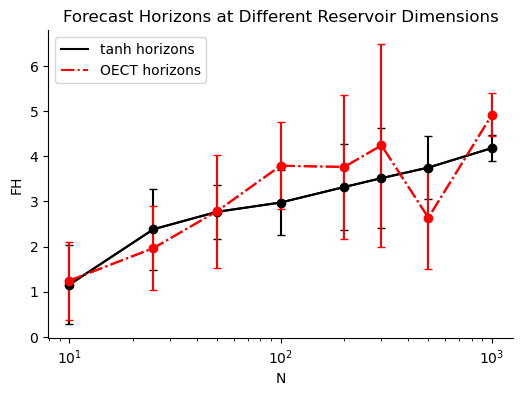

In [1]:
import shelve

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with shelve.open("./Data/new/Data/signals_100") as data:
    datadicts = data["dicts"]
    t = data["time"]
    reservoir_dims = data["dims"]

tolerance = 5  # error tolerance

iterations = 100

OECT_hm = []
tanh_hm = []


# Ensemble begin
for iter in range(iterations):
    OECT_signals = datadicts[iter]["OECT_signals"]
    OECT_predictions = datadicts[iter]["OECT_predictions"]
    tanh_signals = datadicts[iter]["tanh_signals"]
    tanh_predictions = datadicts[iter]["tanh_predictions"]
    

    OECT_horizons = []
    tanh_horizons = []

    for i in range(len(reservoir_dims)):
        n = reservoir_dims[i]

        OECT_signal = OECT_signals[i]
        OECT_prediction = OECT_predictions[i]

        j = 0
        while np.sqrt(np.sum(np.square(OECT_signal[j] - OECT_prediction[j]))) <= tolerance:
            j += 1
        OECT_horizons.append(t[j])

        tanh_signal = tanh_signals[i]
        tanh_prediction = tanh_predictions[i]

        j = 0
        while np.sqrt(np.sum(np.square(tanh_signal[j] - tanh_prediction[j]))) <= tolerance:
            j += 1
        tanh_horizons.append(t[j])
    
    OECT_hm.append(OECT_horizons)
    tanh_hm.append(tanh_horizons)

OECT_hm = np.array(OECT_hm).T

print(OECT_hm)

OECT_means = [np.average(OECT_hm[i]) for i in range(OECT_hm.shape[0])]
OECT_stds = [np.std(OECT_hm[i]) for i in range(OECT_hm.shape[0])]

tanh_hm = np.array(tanh_hm).T

tanh_means = [np.average(tanh_hm[i]) for i in range(tanh_hm.shape[0])]
tanh_stds = [np.std(tanh_hm[i]) for i in range(tanh_hm.shape[0])]


    

# Ensemble end

plt.figure(figsize=(6, 4))
plt.title("Forecast Horizons at Different Reservoir Dimensions")
plt.plot(reservoir_dims, tanh_means, "k-", label="tanh horizons")
plt.errorbar(reservoir_dims, tanh_means, yerr = tanh_stds, fmt ='k-', marker="o", capsize=3)
plt.plot(reservoir_dims, OECT_means, "r-.", label="OECT horizons")
plt.errorbar(reservoir_dims, OECT_means, yerr = OECT_stds, fmt ='r-.', marker="o", capsize=3)
plt.ylabel("FH")
plt.xlabel("N")
plt.xscale("log")

# use seaborn to despine
sns.despine()

plt.legend()

# TODO is standard deviation the right thing for the error bars?

# TODO seaborn dodge.